In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from psyrun.store.npz import NpzStore
import seaborn as sns

# Circular convolution

In [3]:
df = pd.DataFrame(NpzStore().load('../data/time_cconv.npz'))

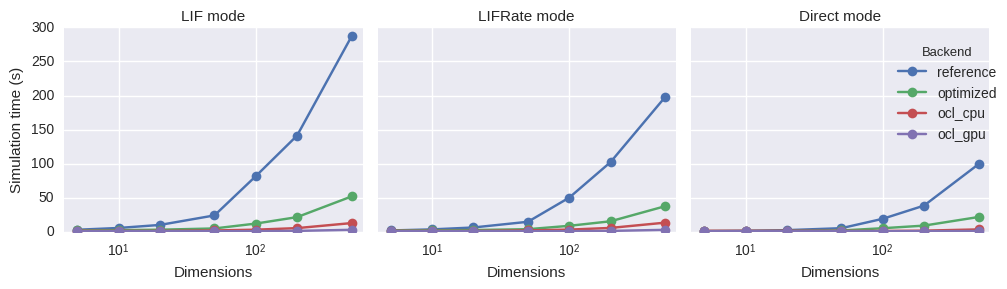

In [4]:
g = sns.FacetGrid(
    df.query('model == "circ_conv" and n_neurons == 500'),
    col='neuron_type', col_order=['LIF', 'LIFRate', 'Direct'],
    hue='backend', hue_order=['reference', 'optimized', 'ocl_cpu', 'ocl_gpu'])
def lineplot(x, y, unit, condition, data, **kwargs):
    del kwargs['label']
    data = data.reset_index()
    return sns.tsplot(
        time=x, value=y, unit=unit, condition=condition, data=data,
        marker='o', err_style='ci_bars',
        **kwargs)
    
g.map_dataframe(lineplot, 'dimensions', 't_sim', unit='trial', condition='backend')
g.map(plt.semilogx)
g.set(xlim=(4, 600))
g.set_titles("{col_name} mode")
g.set_axis_labels("Dimensions", "Simulation time (s)")
g.add_legend(title="Backend", bbox_to_anchor=(1, 0.65))
plt.tight_layout()

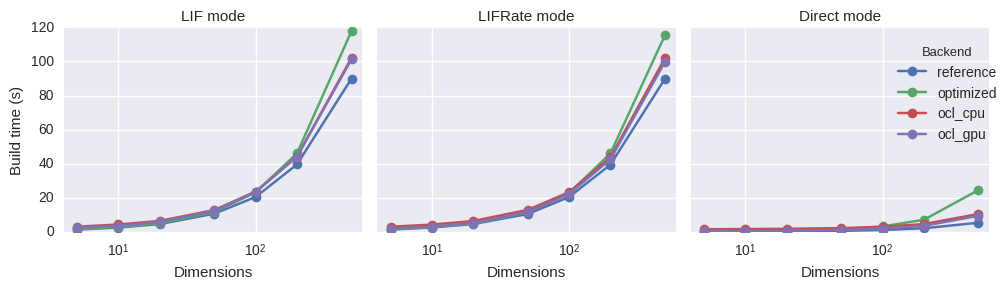

In [5]:
g = sns.FacetGrid(
    df.query('model == "circ_conv" and n_neurons == 500'),
    col='neuron_type', col_order=['LIF', 'LIFRate', 'Direct'],
    hue='backend', hue_order=['reference', 'optimized', 'ocl_cpu', 'ocl_gpu'])
def lineplot(x, y, unit, condition, data, **kwargs):
    del kwargs['label']
    data = data.reset_index()
    return sns.tsplot(
        time=x, value=y, unit=unit, condition=condition, data=data,
        marker='o', err_style='ci_bars',
        **kwargs)
    
g.map_dataframe(lineplot, 'dimensions', 't_build', unit='trial', condition='backend')
g.map(plt.semilogx)
g.set(xlim=(4, 600))
g.set_titles("{col_name} mode")
g.set_axis_labels("Dimensions", "Build time (s)")
g.add_legend(title="Backend", bbox_to_anchor=(1, 0.65))
plt.tight_layout()

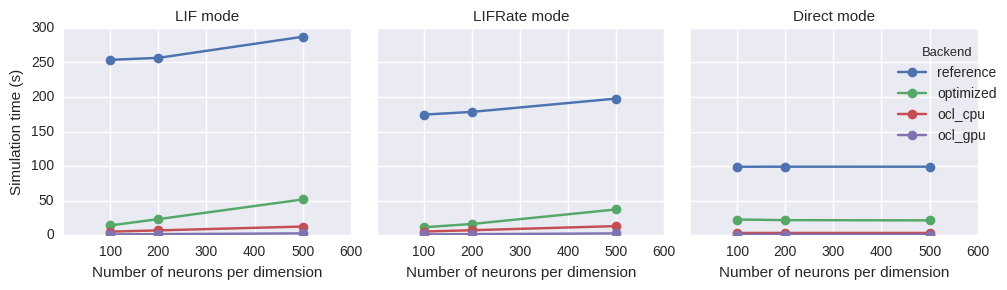

In [6]:
g = sns.FacetGrid(
    df.query('model == "circ_conv" and dimensions == 500'),
    col='neuron_type', col_order=['LIF', 'LIFRate', 'Direct'],
    hue='backend', hue_order=['reference', 'optimized', 'ocl_cpu', 'ocl_gpu'])
def lineplot(x, y, unit, condition, data, **kwargs):
    del kwargs['label']
    data = data.reset_index()
    return sns.tsplot(
        time=x, value=y, unit=unit, condition=condition, data=data,
        marker='o', err_style='ci_bars',
        **kwargs)
    
g.map_dataframe(lineplot, 'n_neurons', 't_sim', unit='trial', condition='backend')
#g.map(plt.semilogx)
g.set(xlim=(4, 600))
g.set_titles("{col_name} mode")
g.set_axis_labels("Number of neurons per dimension", "Simulation time (s)")
g.add_legend(title="Backend", bbox_to_anchor=(1, 0.65))
plt.tight_layout()

# n-back

In [7]:
df = pd.DataFrame(NpzStore().load('../data/time_nback.npz'))

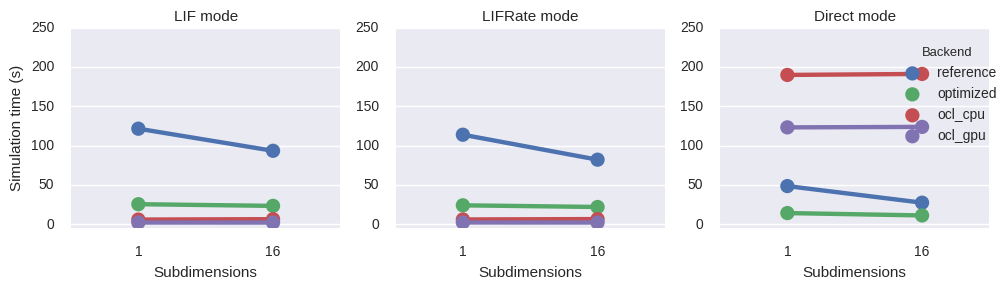

In [8]:
g = sns.FacetGrid(
    df.query('model == "nback"'),
    col='neuron_type', col_order=['LIF', 'LIFRate', 'Direct'],
    )
    
g.map_dataframe(
    sns.pointplot, 'sd', 't_sim',
    hue='backend', hue_order=['reference', 'optimized', 'ocl_cpu', 'ocl_gpu'],
    palette='deep')
g.set(ylim=(-5, 250))
g.set_titles("{col_name} mode")
g.set_axis_labels("Subdimensions", "Simulation time (s)")
g.add_legend(title="Backend", bbox_to_anchor=(1, 0.65), label_order=['reference', 'optimized', 'ocl_cpu', 'ocl_gpu'])
g.despine(offset=5)
plt.tight_layout()

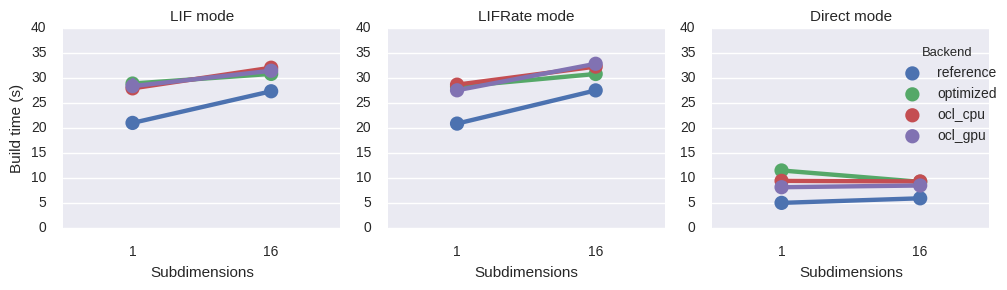

In [9]:
g = sns.FacetGrid(
    df.query('model == "nback"'),
    col='neuron_type', col_order=['LIF', 'LIFRate', 'Direct'],
    )
    
g.map_dataframe(
    sns.pointplot, 'sd', 't_build',
    hue='backend', hue_order=['reference', 'optimized', 'ocl_cpu', 'ocl_gpu'],
    palette='deep')
g.set_titles("{col_name} mode")
g.set_axis_labels("Subdimensions", "Build time (s)")
g.add_legend(title="Backend", bbox_to_anchor=(1, 0.65), label_order=['reference', 'optimized', 'ocl_cpu', 'ocl_gpu'])
g.despine(offset=5)
plt.tight_layout()

# Spaun

In [10]:
df = pd.DataFrame(NpzStore().load('../data/time_spaun.npz'))

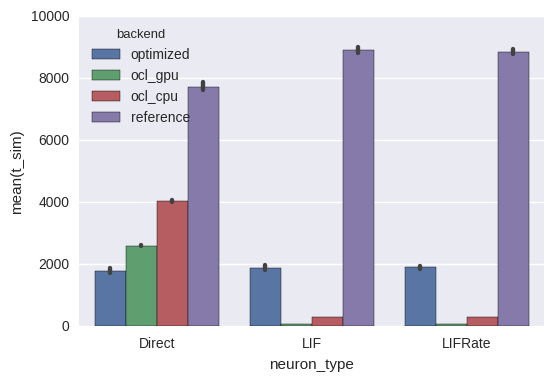

In [11]:
sns.barplot('neuron_type', 't_sim', hue='backend', data=df)

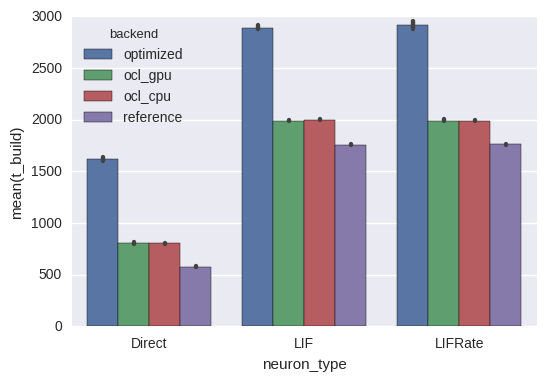

In [12]:
sns.barplot('neuron_type', 't_build', hue='backend', data=df)